In [63]:
import os
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
import cv2
from PIL import Image
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import layers,models
import torch

In [64]:
dataset_path = "Dataset"

In [65]:
# Mengecek apakah path ada
if os.path.exists(dataset_path):
    print("Dataset ditemukan di path tersebut.")
else:
    print("Dataset tidak ditemukan di path tersebut.")

Dataset ditemukan di path tersebut.


In [66]:
# Kompilasi dataset
all_files = []
all_labels = []
classes = os.listdir(dataset_path)

for class_name in classes:
    class_path = os.path.join(dataset_path, class_name)
    images = os.listdir(class_path)

    for img in images:
        all_files.append(os.path.join(class_path, img))
        all_labels.append(class_name)


In [67]:
# Split dataset
X_train, X_test, y_train, y_test = train_test_split(all_files, all_labels, test_size=0.2, stratify=all_labels, random_state=42)

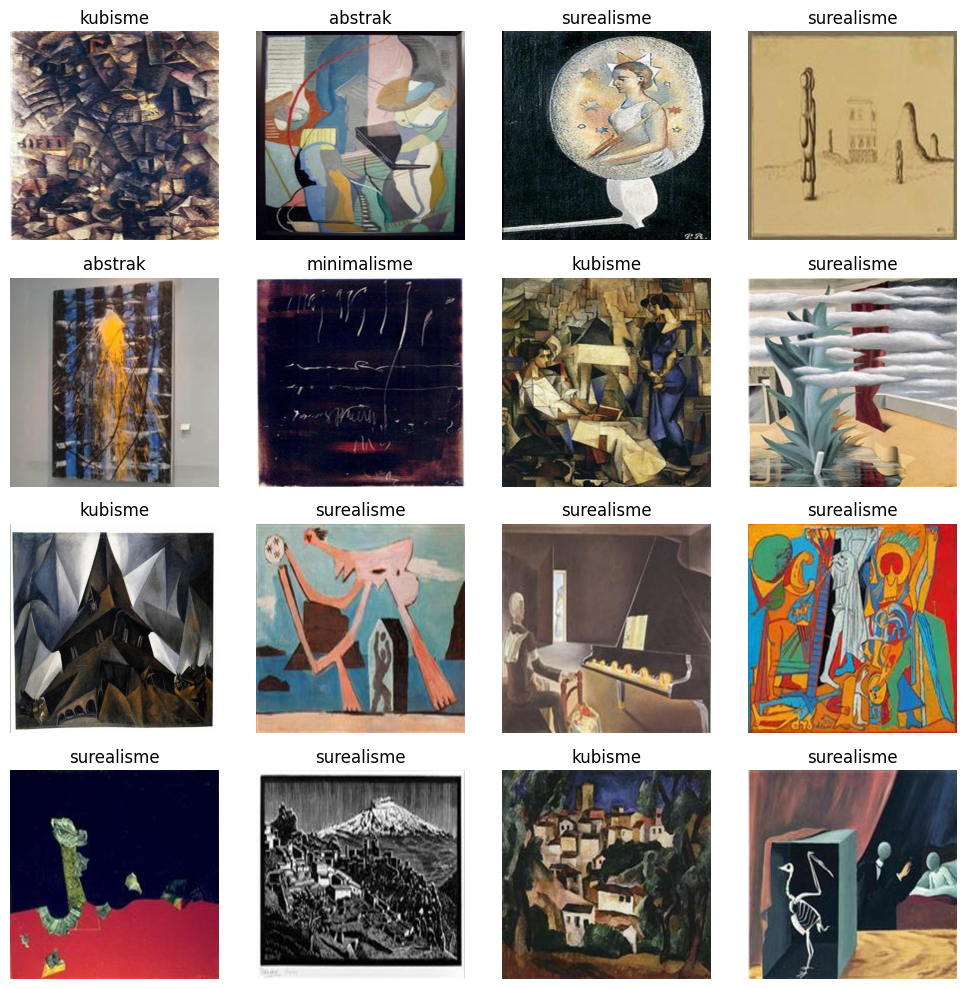

In [68]:
# Tampilkan sampel dataset
plt.figure(figsize=(10,10))
for i in range (16):
  plt.subplot(4,4,i+1)
  img = mpimg.imread(X_train[i])
  plt.imshow(img)
  plt.title(y_train[i])
  plt.xticks([])
  plt.yticks([])
  plt.axis('off')
plt.tight_layout()  # Atur tata letak agar rapi
plt.show()

In [69]:
from PIL import Image
def load_and_preprocess_images(file_paths):
  images = []
  for file_path in file_paths:
    try:
        img = Image.open(file_path)
        img.verify()
    except Exception as e:
        print(f"Corrupt image: {file_path}, error: {e}")

    # Load image 
    img = cv2.imread(file_path)
    # Resize
    img = cv2.resize(img, (32, 32))  
    # Normalize 
    img = img / 255.0
    images.append(img)
  # Konversi ke array NumPy 
  return np.array(images)

X_train = load_and_preprocess_images(X_train)
X_test = load_and_preprocess_images(X_test)

In [70]:
# Encode Label
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

In [71]:
model_before=models.Sequential()
model_before.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_before.add(layers.MaxPooling2D((2, 2)))
model_before.add(layers.Conv2D(32, (3, 3), activation='relu'))  
model_before.add(layers.MaxPooling2D((2, 2)))
model_before.add(layers.Flatten())  
model_before.add(layers.Dense(128, activation='relu'))
model_before.add(layers.Dense(10, activation='softmax')) 
model_before.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model_before.fit(X_train,y_train,epochs=20,validation_data=(X_test,y_test))


Epoch 1/20
50/50 [==============================] - 16s 101ms/step - loss: 1.3928 - accuracy: 0.3288 - val_loss: 1.1781 - val_accuracy: 0.4625
Epoch 2/20
50/50 [==============================] - 2s 43ms/step - loss: 1.1454 - accuracy: 0.4494 - val_loss: 1.1208 - val_accuracy: 0.4800
Epoch 3/20
50/50 [==============================] - 2s 49ms/step - loss: 1.1171 - accuracy: 0.4825 - val_loss: 1.1236 - val_accuracy: 0.4625
Epoch 4/20
50/50 [==============================] - 3s 61ms/step - loss: 1.0594 - accuracy: 0.5150 - val_loss: 1.0719 - val_accuracy: 0.5300
Epoch 5/20
50/50 [==============================] - 3s 58ms/step - loss: 1.0404 - accuracy: 0.5400 - val_loss: 1.1576 - val_accuracy: 0.4925
Epoch 6/20
50/50 [==============================] - 3s 51ms/step - loss: 0.9910 - accuracy: 0.5763 - val_loss: 1.0522 - val_accuracy: 0.5225
Epoch 7/20
50/50 [==============================] - 3s 58ms/step - loss: 0.9725 - accuracy: 0.5681 - val_loss: 1.0511 - val_accuracy: 0.4825
Epoch 8/20


In [72]:
model_before.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 32)        9248      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 6, 6, 32)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1152)              0         
                                                                 
 dense_8 (Dense)             (None, 128)              

13/13 [==============================] - 2s 18ms/step
Test Loss: 1.2225
Test Accuracy: 0.5625

Classification Report:
              precision    recall  f1-score   support

     abstrak       0.45      0.52      0.48       100
     kubisme       0.52      0.58      0.55       100
 minimalisme       0.75      0.80      0.77       100
  surealisme       0.52      0.35      0.42       100

    accuracy                           0.56       400
   macro avg       0.56      0.56      0.56       400
weighted avg       0.56      0.56      0.56       400


Confusion Matrix:


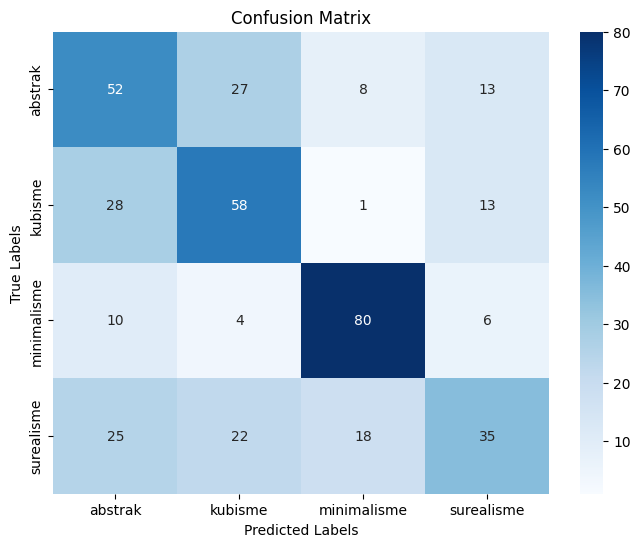

In [73]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the test set
loss, accuracy = model_before.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model_before.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Calculate and print evaluation metrics
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

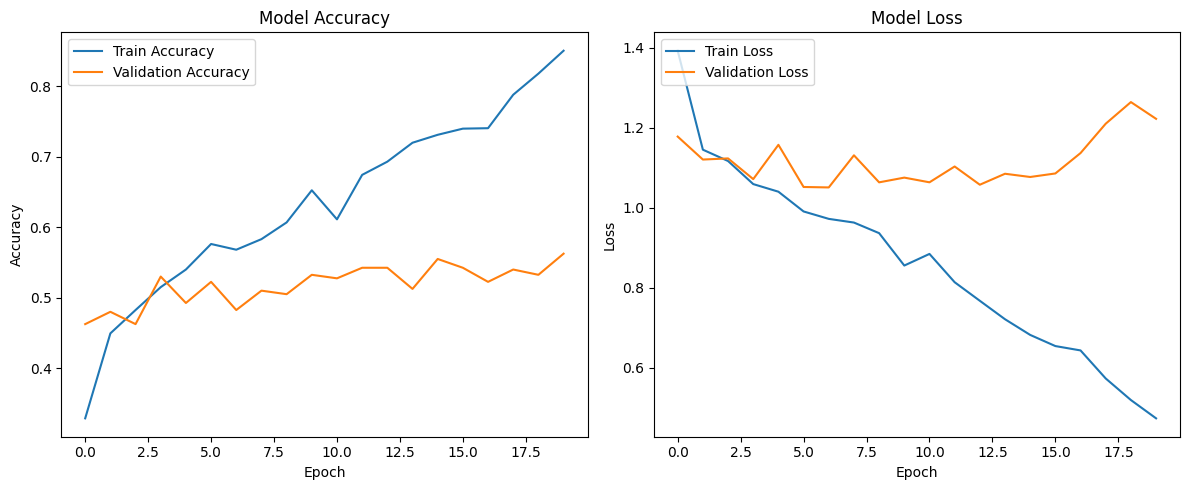

In [74]:
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history)

In [75]:
from sklearn.metrics import classification_report

# Assuming `model` is your trained model, and X_test, y_test are your test data
predictions = model_before.predict(X_test)
predicted_classes = predictions.argmax(axis=1)

13/13 [==============================] - 0s 20ms/step


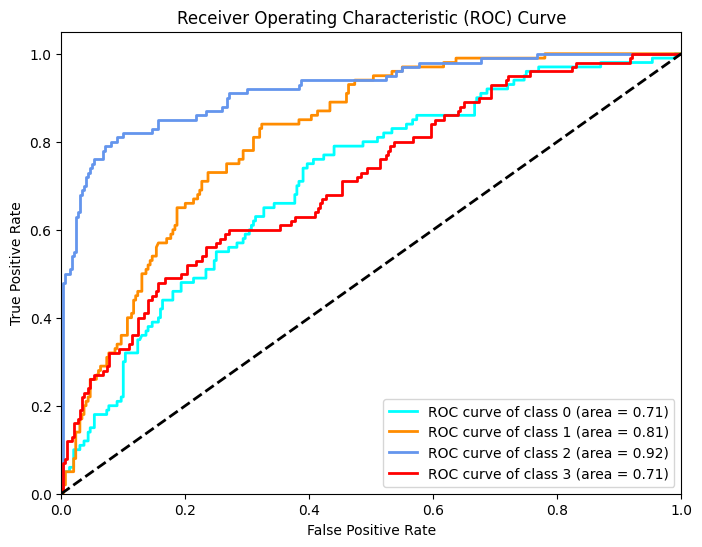

In [76]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make sure y_test contains class labels (not one-hot encoded), and predictions contains probabilities
fpr = {}
tpr = {}
roc_auc = {}

# Number of classes (adjust this if needed)
num_classes = 4  # Adjust based on your dataset

for i in range(num_classes):
    # For class i, create a binary label for y_test and get the probabilities for class i from predictions
    y_test_binary = (y_test == i).astype(int)  # Create binary labels for the class
    # Get the predicted probabilities for class i
    predictions_class = predictions[:, i]  # Assuming predictions is of shape (num_samples, num_classes)

    # Calculate FPR, TPR, and AUC for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, predictions_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


In [85]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',

)

datagen.fit(X_train)

In [86]:
train_generator = datagen.flow(X_train, y_train, batch_size=32)

In [87]:
model=models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (3, 3), activation='relu'))  
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())  
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(10, activation='softmax')) 
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [88]:
batch_size=32
history_after=model.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(X_train) // batch_size,
    epochs=20,
    validation_data=(X_test, y_test)  
)

Epoch 1/20
50/50 [==============================] - 20s 204ms/step - loss: 1.4154 - accuracy: 0.3162 - val_loss: 1.2629 - val_accuracy: 0.4125
Epoch 2/20
50/50 [==============================] - 9s 169ms/step - loss: 1.2009 - accuracy: 0.4275 - val_loss: 1.1590 - val_accuracy: 0.4400
Epoch 3/20
50/50 [==============================] - 9s 178ms/step - loss: 1.1807 - accuracy: 0.4256 - val_loss: 1.1087 - val_accuracy: 0.5125
Epoch 4/20
50/50 [==============================] - 9s 179ms/step - loss: 1.1214 - accuracy: 0.4719 - val_loss: 1.2217 - val_accuracy: 0.4525
Epoch 5/20
50/50 [==============================] - 10s 201ms/step - loss: 1.0955 - accuracy: 0.5069 - val_loss: 1.1564 - val_accuracy: 0.4750
Epoch 6/20
50/50 [==============================] - 9s 178ms/step - loss: 1.0955 - accuracy: 0.4950 - val_loss: 1.2758 - val_accuracy: 0.4325
Epoch 7/20
50/50 [==============================] - 9s 173ms/step - loss: 1.0600 - accuracy: 0.5125 - val_loss: 1.1069 - val_accuracy: 0.5025
Epoc

13/13 [==============================] - 1s 18ms/step
Test Loss: 1.0089
Test Accuracy: 0.5575

Classification Report:
              precision    recall  f1-score   support

     abstrak       0.50      0.27      0.35       100
     kubisme       0.44      0.74      0.55       100
 minimalisme       0.83      0.76      0.79       100
  surealisme       0.53      0.46      0.49       100

    accuracy                           0.56       400
   macro avg       0.58      0.56      0.55       400
weighted avg       0.58      0.56      0.55       400


Confusion Matrix:


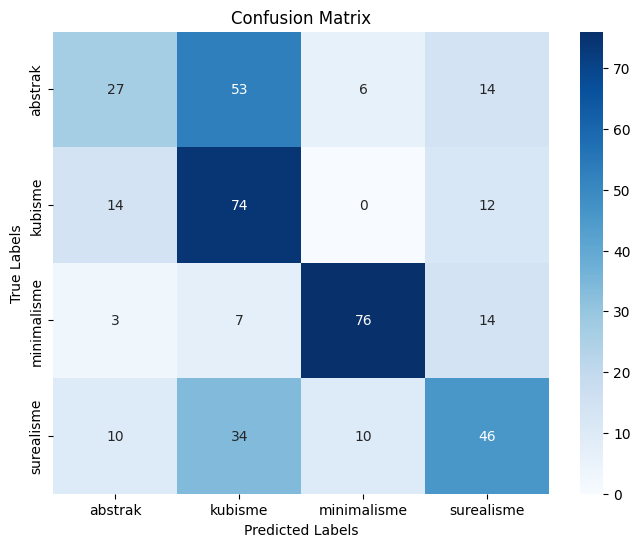

In [89]:
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)  # Get predicted class labels

# Calculate and print evaluation metrics
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes, target_names=label_encoder.classes_))

# Confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

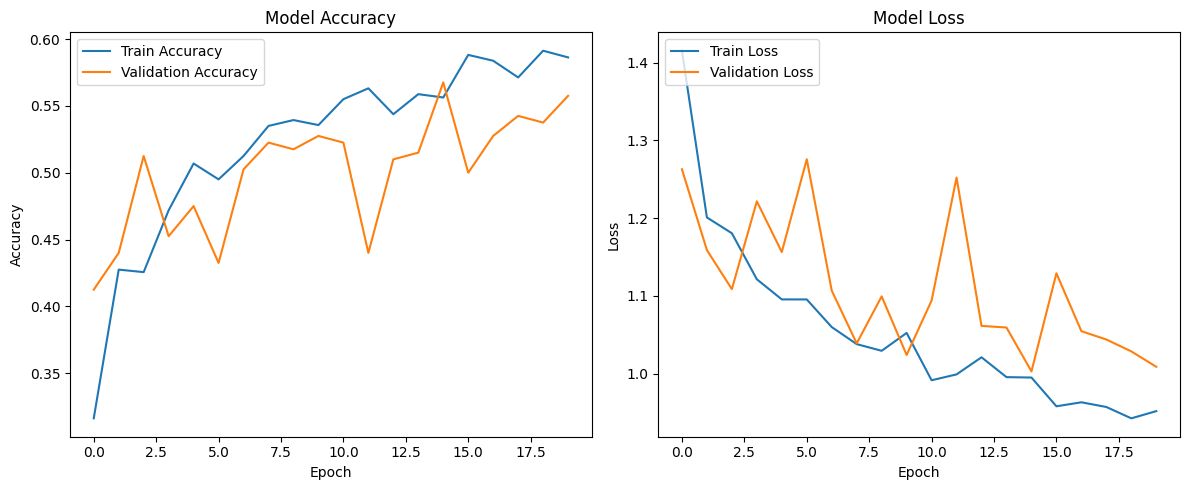

In [90]:
def plot_training_history(history):
    # Plot accuracy
    plt.figure(figsize=(12, 5))

    # Subplot 1: Accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Subplot 2: Loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(loc='upper left')

    # Show plot
    plt.tight_layout()
    plt.show()

# Call the function to plot accuracy and loss
plot_training_history(history_after)

In [91]:
from sklearn.metrics import classification_report

# Assuming `model` is your trained model, and X_test, y_test are your test data
predictions = model.predict(X_test)


predicted_classes = predictions.argmax(axis=1)

# Generate the classification report
class_report = classification_report(y_test, predicted_classes)
print("\nClassification Report:\n", class_report)


13/13 [==============================] - 1s 13ms/step

Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.27      0.35       100
           1       0.44      0.74      0.55       100
           2       0.83      0.76      0.79       100
           3       0.53      0.46      0.49       100

    accuracy                           0.56       400
   macro avg       0.58      0.56      0.55       400
weighted avg       0.58      0.56      0.55       400



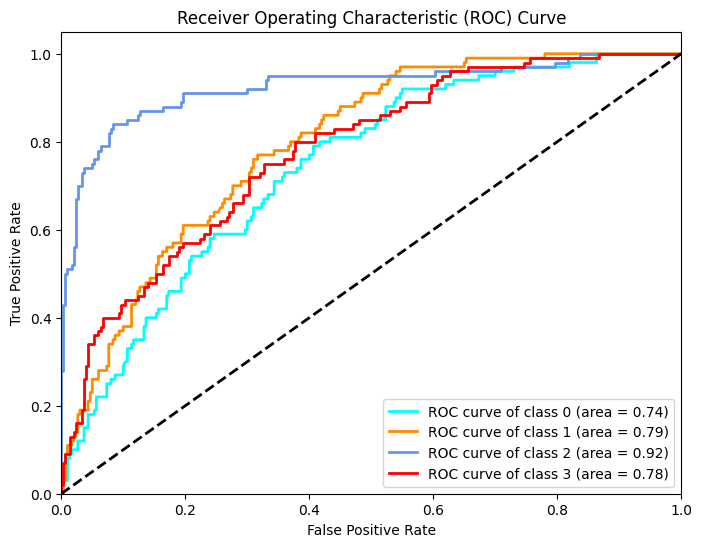

In [92]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Make sure y_test contains class labels (not one-hot encoded), and predictions contains probabilities
fpr = {}
tpr = {}
roc_auc = {}

# Number of classes (adjust this if needed)
num_classes = 4  # Adjust based on your dataset

for i in range(num_classes):
    # For class i, create a binary label for y_test and get the probabilities for class i from predictions
    y_test_binary = (y_test == i).astype(int)  # Create binary labels for the class
    # Get the predicted probabilities for class i
    predictions_class = predictions[:, i]  # Assuming predictions is of shape (num_samples, num_classes)

    # Calculate FPR, TPR, and AUC for each class
    fpr[i], tpr[i], _ = roc_curve(y_test_binary, predictions_class)
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'red']
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2, label=f'ROC curve of class {i} (area = {roc_auc[i]:0.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
